## Importing Library

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

Using TensorFlow backend.


1.10.0


## Import Data

In [2]:
path = "/Users/chanhee/Desktop/foundation_toy.csv"
idx_col = 0

data = pd.read_csv(path,index_col=idx_col)
sample,features = data.shape

print("sample : {}  \nfeatures : {}".format(sample,features))

sample : 1400  
features : 311


## Split Train Test Data

In [3]:
train_data,test_data = train_test_split(data, test_size=0.2)
y_val = train_data.result
x_val = train_data.drop(["patient","cancer_code","result"],axis=1)

test_y_val = test_data.result
test_x_val = test_data.drop(["patient","cancer_code","result"],axis=1)

## Modeling Seperate Model

###  Building seperate model for ensemble(model 1, 2, 3)

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

input_m1 = Input(shape=(308,))
h1_m1 = Dense(200,activation='relu')(input_m1)
h2_m1 = Dense(150,activation='relu')(h1_m1) 
h3_m1 = Dense(100,activation='relu')(h2_m1) 
h4_m1 = Dense(10,activation='relu')(h3_m1) 
output_m1 = Dense(1,activation="sigmoid")(h4_m1) 
model1 = Model(inputs=input_m1,outputs=output_m1)


input_m2 = Input(shape=(308,))
h1_m2 = Dense(250,activation='relu')(input_m2)
h2_m2 = Dense(100,activation='relu')(h1_m2) 
h3_m2 = Dense(30,activation='relu')(h2_m2)
h4_m2 = Dense(10,activation='relu')(h3_m2) 
output_m2 = Dense(1,activation="sigmoid")(h4_m2)
model2 = Model(inputs=input_m2,outputs=output_m2)

input_m3 = Input(shape=(308,))
h1_m3 = Dense(200,activation='relu')(input_m3)
h2_m3 = Dense(100,activation='relu')(h1_m3) 
h3_m3 = Dense(100,activation='relu')(h2_m3)
h4_m3 = Dense(10,activation='relu')(h3_m3) 
output_m3 = Dense(1,activation="sigmoid")(h4_m3)
model3 = Model(inputs=input_m3,outputs=output_m3)

model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(x_val, y_val, epochs=13)
model2.fit(x_val, y_val, epochs=13)
model3.fit(x_val, y_val, epochs=13)



Epoch 1/13
1120/1120 [==============================] - 0s 408us/step - loss: 0.4162 - acc: 0.8054
Epoch 2/13
1120/1120 [==============================] - 0s 71us/step - loss: 0.2186 - acc: 0.9161
Epoch 3/13
1120/1120 [==============================] - 0s 70us/step - loss: 0.1846 - acc: 0.9312
Epoch 4/13
1120/1120 [==============================] - 0s 65us/step - loss: 0.1125 - acc: 0.9616
Epoch 5/13
1120/1120 [==============================] - 0s 63us/step - loss: 0.1435 - acc: 0.9411
Epoch 6/13
1120/1120 [==============================] - 0s 58us/step - loss: 0.1216 - acc: 0.9446
Epoch 7/13
1120/1120 [==============================] - 0s 64us/step - loss: 0.1075 - acc: 0.9589
Epoch 8/13
1120/1120 [==============================] - 0s 67us/step - loss: 0.0650 - acc: 0.9741
Epoch 9/13
1120/1120 [==============================] - 0s 67us/step - loss: 0.0534 - acc: 0.9821
Epoch 10/13
1120/1120 [==============================] - 0s 61us/step - loss: 0.0420 - acc: 0.9813
Epoch 11/13
1120/1

### Evaluating seperate model's performance

In [5]:
m1_loss,m1_accuracy= model1.evaluate(test_x_val,test_y_val)
m2_loss,m2_accuracy= model2.evaluate(test_x_val,test_y_val)
m3_loss,m3_accuracy= model3.evaluate(test_x_val,test_y_val)

print("\nAccuracy for model 1, 2, 3 : {},{},{}".format(m1_accuracy,m2_accuracy,m3_accuracy))

280/280 [==============================] - 0s 251us/step

Accuracy for model 1, 2, 3 : 0.9107142857142857,0.9071428554398673,0.9142857142857143


## Modeling Ensemble model

### Building original ensemble model

In [6]:
m1_predictions = model1.predict(x_val)
m2_predictions = model2.predict(x_val)
m3_predictions = model2.predict(x_val)

ensemble_x_val = np.concatenate([m1_predictions, m2_predictions, m3_predictions], axis=1)

ensemble_model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),name="input_layer"),
    keras.layers.Dense(2,activation="relu"),        
    keras.layers.Dense(1,activation='sigmoid',name="output_layer")])

ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ensemble_model.fit(ensemble_x_val, y_val, epochs=5, batch_size= 1)


Epoch 1/5
1120/1120 [==============================] - 1s 1ms/step - loss: 0.4180 - acc: 0.9223
Epoch 2/5
1120/1120 [==============================] - 1s 789us/step - loss: 0.2152 - acc: 0.9955
Epoch 3/5
1120/1120 [==============================] - 1s 760us/step - loss: 0.1331 - acc: 0.9973
Epoch 4/5
1120/1120 [==============================] - 1s 753us/step - loss: 0.0852 - acc: 0.9973
Epoch 5/5
1120/1120 [==============================] - 1s 751us/step - loss: 0.0559 - acc: 0.9982


### Evaluating _DNN Combiner_ ensemble model

In [7]:
m1_test_predictions = model1.predict(test_x_val)
m2_test_predictions = model2.predict(test_x_val)
m3_test_predictions = model2.predict(test_x_val)

ensemble_test_x_val = np.concatenate([m1_test_predictions, m2_test_predictions, m3_test_predictions], axis=1)

em_loss,em_accuracy= ensemble_model.evaluate(ensemble_test_x_val,test_y_val)

print("Accuracy for DNN combiner ensemble : {}".format(em_accuracy))

280/280 [==============================] - 0s 274us/step
Accuracy for DNN combiner ensemble : 0.925


### Evaluating _mean_ ensemble model

In [8]:
mean_predictions=(m1_test_predictions+m2_test_predictions+m3_test_predictions)/3
labled_predictions = np.where(mean_predictions > 0.5, 1, 0).flatten()
mean_em_accuracy = sum(labled_predictions==test_y_val.values)/len(test_y_val)

print("Accuracy for mean ensemble : {}".format(mean_em_accuracy))

Accuracy for mean ensemble : 0.9285714285714286


## Transferred Ensemble Modeling 

### Making new input data for t-ensemble

In [9]:
from keras.models import Model
model = Model(inputs=[input_m1], outputs=[h4_m1])
results_m1 = model.predict([x_val])

model = Model(inputs=[input_m2], outputs=[h4_m2])
results_m2 = model.predict([x_val])

model = Model(inputs=[input_m3], outputs=[h4_m3])
results_m3 = model.predict([x_val])

t_ensemble_x_val = np.concatenate([results_m1, results_m2, results_m3], axis=1)
print(t_ensemble_x_val.shape)

(1120, 30)


### Modeling t-ensemble  

In [10]:
t_ensemble_input = Input(shape=(30,))
t_ensemble_h1 = Dense(20,activation='relu')(t_ensemble_input)
t_ensemble_h2 = Dense(10,activation='relu')(t_ensemble_h1)
t_ensemble_h3 = Dense(5,activation='relu')(t_ensemble_h2)
t_ensemble_output = Dense(1,activation='sigmoid')(t_ensemble_h3)

t_ensemble_model = Model(inputs=[t_ensemble_input],outputs=[t_ensemble_output])
t_ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

t_ensemble_model.fit(t_ensemble_x_val, y_val, epochs=2,batch_size=5)

Epoch 1/2
1120/1120 [==============================] - 1s 498us/step - loss: 0.1953 - acc: 0.9277
Epoch 2/2
1120/1120 [==============================] - 0s 247us/step - loss: 0.0118 - acc: 1.0000


### Evaluating t-ensemble

In [11]:
model = Model(inputs=[input_m1], outputs=[h4_m1])
test_results_m1 = model.predict([test_x_val])
model = Model(inputs=[input_m2], outputs=[h4_m2])
test_results_m2 = model.predict([test_x_val])
model = Model(inputs=[input_m3], outputs=[h4_m3])
test_results_m3 = model.predict([test_x_val])

t_ensemble_test_x_val = np.concatenate([test_results_m1, test_results_m2, test_results_m3], axis=1)
t_em_accuracy = t_ensemble_model.evaluate(t_ensemble_test_x_val,test_y_val)[1]
print("\nAccuracy for t-ensemble: ",t_em_accuracy )

280/280 [==============================] - 0s 354us/step

Accuracy for t-ensemble:  0.942857141154153


## Performance Comparison

In [12]:
label = ["model1","model2","model3","mean-em","d-comb em","t-em"]
accuracy = [m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy ]

In [21]:
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(30,20))
    axes = plt.gca()
    axes.set_ylim([min(m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy)-0.02,1])
    index = np.arange(len(label))
    plt.bar(index, accuracy,color=['red', 'orange', 'yellow', "green",'blue', 'purple',],alpha=0.5,width=0.3)
    plt.xlabel('Method', fontsize=35)
    plt.ylabel('Accuracy', fontsize=35)
    plt.yticks(fontsize=30)    
    plt.xticks(index, label, fontsize=30, rotation=90)
    plt.title('Performance Comparison for each Ensemble Model',fontsize=40)
    plt.show()

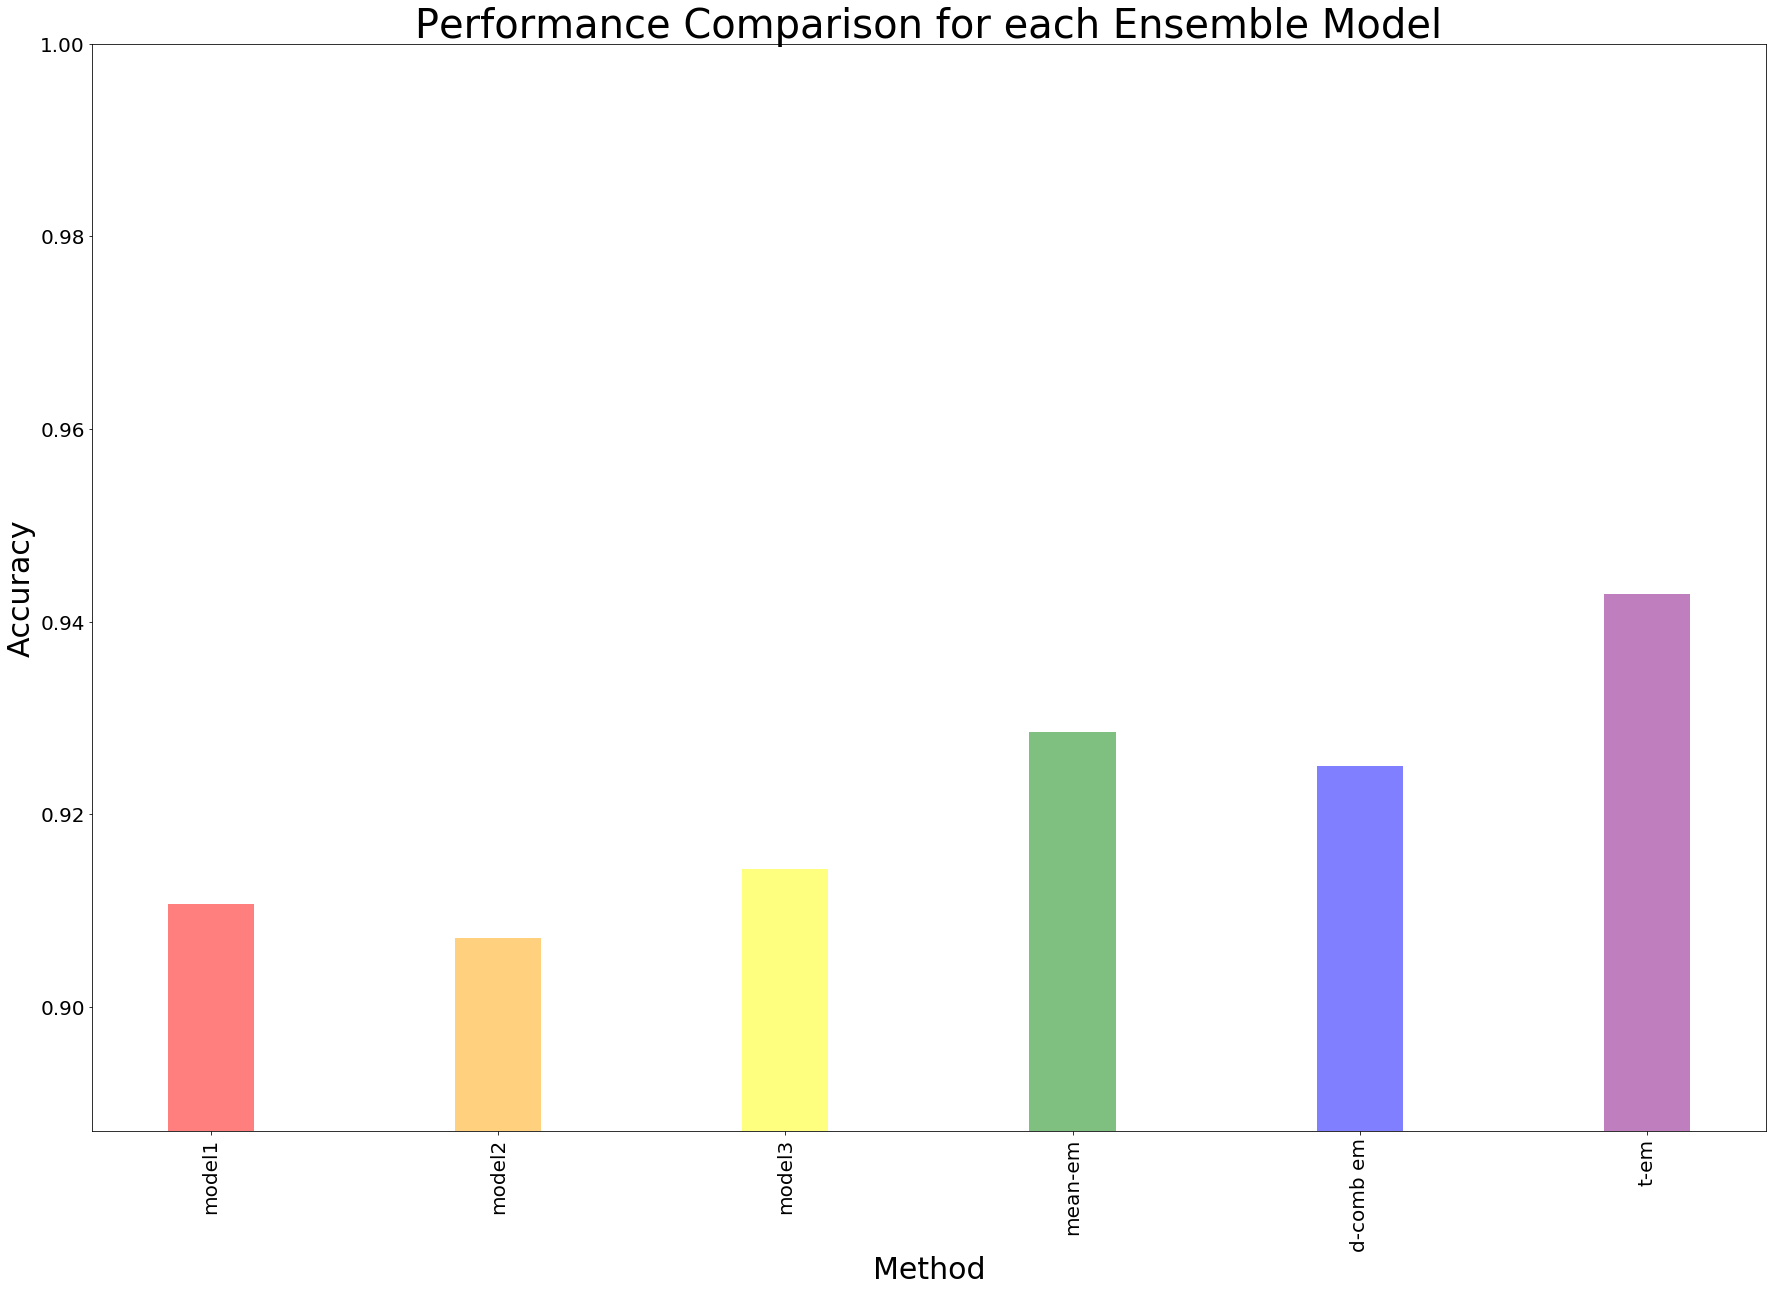

In [22]:
plot_bar_x()